<a href="https://colab.research.google.com/github/keymemory/Machine_Learning_Second/blob/main/ML2_day3_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 50

In [ ]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print(73 * '_')

print('% 9s' % 'init'
      '         time   inertia   homo   compl   v-meas   ARI     silhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    

pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=10),
              name="PCA-based",
              data=data)
print(73 * '_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
_________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI     silhouette
PCA-based   0.05s    70768   0.668   0.695   0.681   0.558    0.175
_________________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

h = .03     # point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 3
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

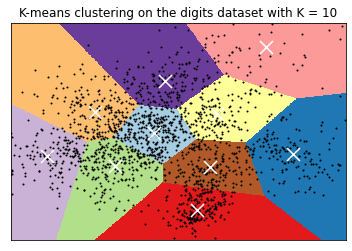

In [ ]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset with K = 10')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

ㅡㅡㅡㅡㅡ 선 ㅡㅡㅡㅡㅡ

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

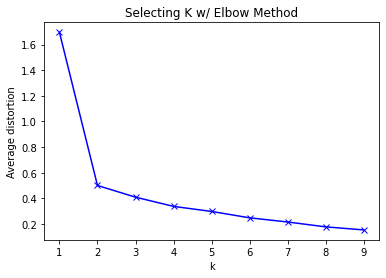

In [ ]:
cluster1 = np.random.uniform(0.1, 1.5, (2, 10))
cluster2 = np.random.uniform(4.2, 1.9, (2,10))
X = np.hstack((cluster1, cluster2)).T

K = range(1, 10)
meandistortions = []
for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 
                  'euclidean'), axis = 1))/ X.shape[0])
        
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting K w/ Elbow Method')
plt.show()

ㅡㅡㅡㅡㅡ 여러개 ㅡㅡㅡㅡㅡ

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from som import Som

som = Som(16,16,64,sigma=1.3,learning_rate=0.5)
som.random_weights_init(data)
print("Initialising SOM.")
som.train_random(data,10000) 
print("\n SOM Processing Complete.")


ModuleNotFoundError: ignored

In [ ]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) 
colorbar()

labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
 w = som.winner(xx) 
 plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],markerfacecolor='None',
   markeredgecolor=colors[labels[cnt]],markersize=12,markeredgewidth=2)
axis([0,som.weights.shape[0],0,som.weights.shape[1]])
show()

------ doc -----

In [ ]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

In [ ]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

In [ ]:
def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y

X, y = nudge_images(X, y)

In [ ]:
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

In [ ]:
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

In [ ]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()